In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)
pd.set_option('display.width',1000)
%matplotlib inline 
plt.figure(figsize=(16,7))
plt.style.use('seaborn-v0_8-darkgrid')

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

<Figure size 1600x700 with 0 Axes>

In [2]:
import wordcloud

In [3]:
data=pd.read_csv('startup_funding.csv')

In [4]:
data.columns=['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorsName', 
            'InvestmentnType', 'AmountInUSD', 'Remarks']
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorsName', 'InvestmentnType', 'AmountInUSD', 'Remarks'], dtype='object')

In [5]:
#clean stings of break spaces
def clean_strings(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0","")
#apply the function
for col in ['StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorsName', 
            'InvestmentnType', 'AmountInUSD', 'Remarks']:
    data[col] = data[col].apply(lambda x: clean_strings(x))
                                                   

In [6]:
data.shape

(3044, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               3044 non-null   int64 
 1   Date              3044 non-null   object
 2   StartupName       3044 non-null   object
 3   IndustryVertical  3044 non-null   object
 4   SubVertical       3044 non-null   object
 5   City              3044 non-null   object
 6   InvestorsName     3044 non-null   object
 7   InvestmentnType   3044 non-null   object
 8   AmountInUSD       3044 non-null   object
 9   Remarks           3044 non-null   object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [8]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentnType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [9]:
data.describe(include='object')

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentnType,AmountInUSD,Remarks
count,3044,3044,3044,3044,3044,3044,3044,3044,3044
unique,1035,2457,822,1943,108,2409,56,472,70
top,02/02/2015,Ola Cabs,Consumer Internet,nan,Bangalore,Undisclosed Investors,Private Equity,nan,nan
freq,11,8,941,936,701,39,1356,960,2625


In [10]:
data.describe()

,SNo
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


Data cleaning

In [11]:
total = data.isnull().sum().sort_values(ascending=False)
#pct null
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending =False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent %'])
missing_data

,Total,Percent %
SNo,0,0.0
Date,0,0.0
StartupName,0,0.0
IndustryVertical,0,0.0
SubVertical,0,0.0
City,0,0.0
InvestorsName,0,0.0
InvestmentnType,0,0.0
AmountInUSD,0,0.0
Remarks,0,0.0


remove 'Remarks'

In [12]:
data['Remarks'].value_counts().head()

Remarks
nan             2625
Series A         177
Series B          64
Pre-Series A      37
Series C          28
Name: count, dtype: int64

In [13]:
#drop 'Remarks'
data=data.drop(['Remarks'],axis=1)
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorsName', 'InvestmentnType', 'AmountInUSD'], dtype='object')

convert 'AmountInUSD' to numerical

In [14]:

data.drop_duplicates(keep='first').sort_values(by='AmountInUSD',ascending=False).astype(str).reset_index(drop=True).head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentnType,AmountInUSD
0,35,21/10/2019,The Man Company,Consumer Goods,Beauty and Grooming,Gurgaon,Ayushmann Khurana,Corporate Round,unknown
1,92,05/05/2019,StyleDotMe,E-commerce,Fashion and Shopping,Delhi,Indian Angel Network and other angel investors...,Bridge Round,undisclosed
2,90,06/05/2019,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,undisclosed
3,21,17/11/2019,Burger Singh,Food and Beverage,Indian Burger Brand,Gurgaon,RB Investments,Venture,undisclosed
4,2448,23/09/2015,Credihealth,Healthcare Consulting platform,nan,Gurgaon,Rajat Malhotra,Seed Funding,nan


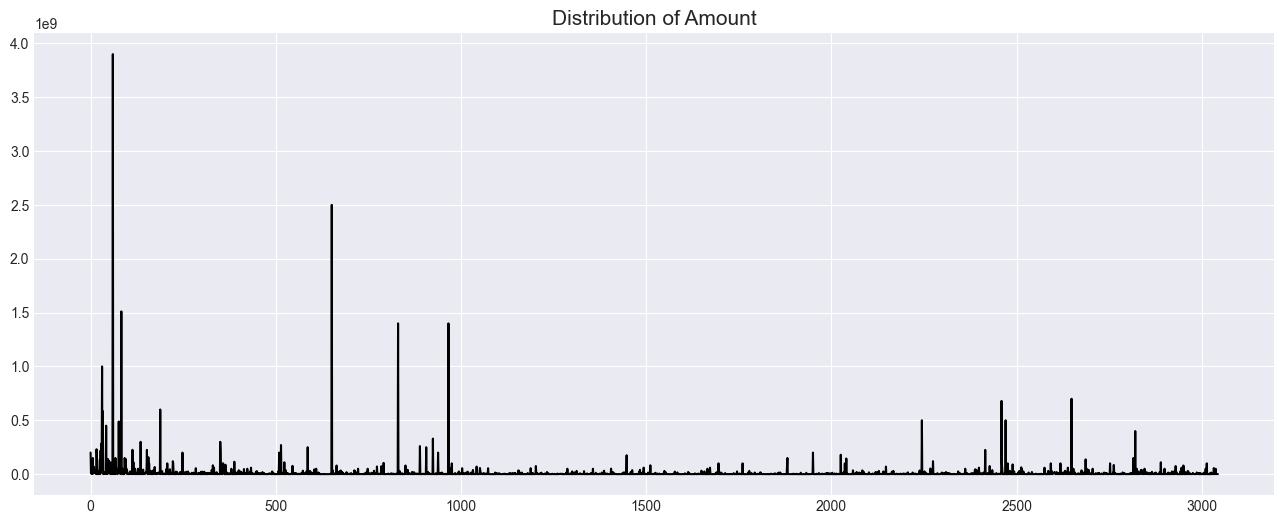

In [15]:
def clean_amount(x):
    x=''.join([dig for dig in str(x) if dig in ['0','1','2','3','4','5','6','7','8','9']])
    x=str(x).replace(",","").replace("+","")
    x=str(x).lower().replace('undisclosed',"")
    x=str(x).lower().replace('n/a',"")
    if x == None or x == '':
        x='0'    # -999 to create a clear pattern
    return x
    

data['AmountInUSD']=data['AmountInUSD'].apply(lambda x: float(clean_amount(x)))
plt.figure(figsize=(16,6))
data['AmountInUSD'].plot(kind='line',color='black')
plt.title('Distribution of Amount',fontsize = 15)
plt.show()

dates

In [16]:
data.loc[data['Date']=='05/072018','Date']='05/07/2018'
data.loc[data['Date']=='01/07/015','Date']='01/07/2015'
data.loc[data['Date']=='\\\\xc2\\\\xa010/7/2015','Date']='01/07/2015'
data.loc[data['Date']=='12/05.2015','Date']='12/05/2015'
data.loc[data['Date']=='12/05.2015','Date']='12/05/2015'
data.loc[data['Date']=='13/04.2015','Date']='13/04/2015'
data.loc[data['Date']=='15/01.2015','Date']='15/01/2015'
data.loc[data['Date']=='22/01//2015','Date']='22/01/2015'

How does the funding ecosystem change with respect to time?

In [17]:
n=10   #num rows to display
# converting to datetime object
data['YearMonth'] = (pd.to_datetime(data["Date"],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)

temp = data['YearMonth'].value_counts().sort_values(ascending=False).head(n)
print(f'Top_{n} observations of funding per Month in decreasing order:,\n{temp}')

Top_10 observations of funding per Month in decreasing order:,
YearMonth
201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: count, dtype: int64


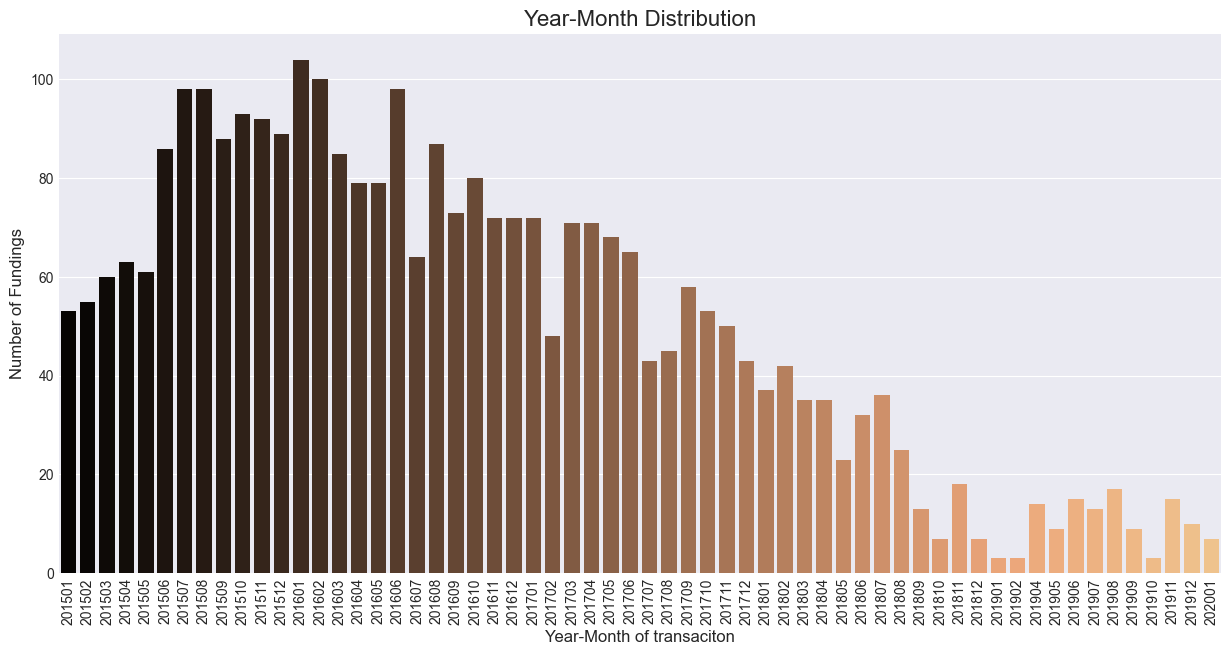

In [18]:
year_month = data['YearMonth'].value_counts()
plt.figure(figsize=(15,7))
sns.barplot(x=year_month.index,y=year_month.values,palette='copper')
plt.xticks(rotation=90)
plt.xlabel('Year-Month of transaciton', fontsize=12)
plt.ylabel('Number of Fundings',fontsize=12)
plt.title('Year-Month Distribution',fontsize=16)
plt.show()

in general $USD$ amount 

In [19]:


@interact
def top_investments(Top_n=7):
       return data.loc[data['AmountInUSD'].isin(data['AmountInUSD'].dropna().sort_values(ascending=False).head(Top_n))][[
       'AmountInUSD',    'StartupName', 'IndustryVertical' ,'SubVertical',       'City',       'InvestorsName', ]].sort_values(by='AmountInUSD',
                     ascending=False).reset_index(drop=True)

interactive(children=(IntSlider(value=7, description='Top_n', max=21, min=-7), Output()), _dom_classes=('widge…

In [20]:
data['StartupName'].value_counts().sort_values(ascending=False).head(8)

StartupName
Ola Cabs     8
Swiggy       8
Paytm        7
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
UrbanClap    6
Name: count, dtype: int64

Paytm

In [21]:
data.loc[data['StartupName']=='Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentnType,AmountInUSD,YearMonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,0.000000e+00,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,0.000000e+00,201502


top n by total investment

In [22]:
# top n b total investment amount
n=10
grouped_amount=data.groupby('StartupName',as_index=False)['AmountInUSD'].agg({'Total_AmountInUSD':'sum','Total_rounds':'count'}).sort_values(by='Total_AmountInUSD',ascending=False)
grouped_amount.head(n)                                                                                                          

,StartupName,Total_AmountInUSD,Total_rounds
692,Flipkart,4.059700e+09,5
1663,Rapido Bike Taxi,3.900000e+09,1
1522,Paytm,3.148950e+09,7
1597,Pratilipi,1.515250e+09,2
1462,Ola,9.845000e+08,4
2129,Udaan,8.700000e+08,4
1882,Snapdeal,7.000000e+08,2
693,Flipkart.com,7.000000e+08,1
1463,Ola Cabs,6.697000e+08,8
2107,True North,6.000000e+08,1


top n startups  by total investment amount  
numbers by number of funding rounds  

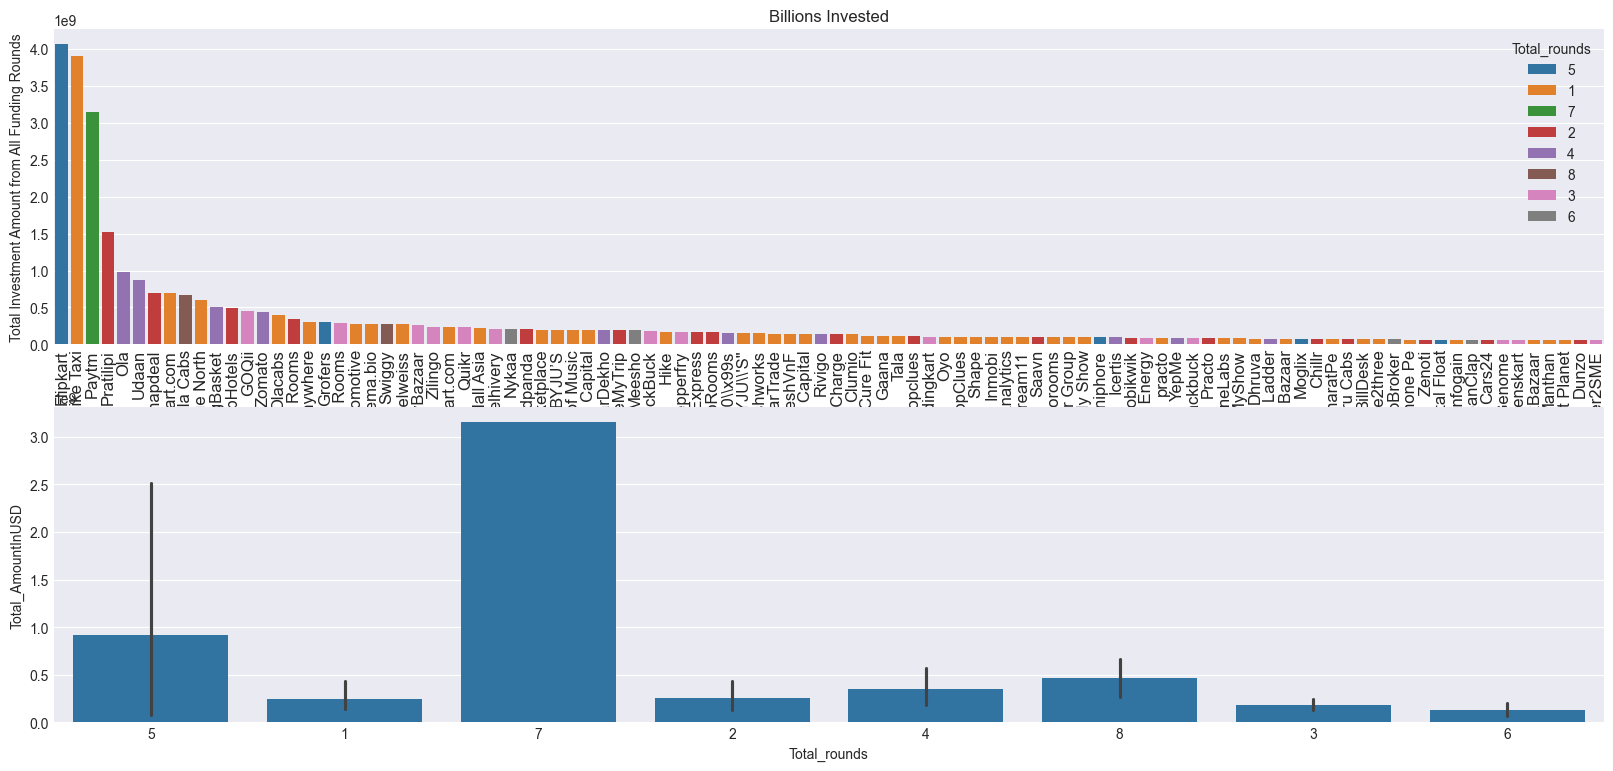

In [23]:
n=100
tot_amt_plt_df=grouped_amount.loc[grouped_amount['Total_AmountInUSD']>0].sort_values(by='Total_AmountInUSD',
                ascending=False).head(n)
tot_amt_plt_df['Total_rounds']=tot_amt_plt_df['Total_rounds'].apply(lambda x: str(x))
fig=plt.figure(figsize=(20,9))
plt.subplot(2,1,1)
sns.barplot(data=tot_amt_plt_df,y='Total_AmountInUSD',x='StartupName',hue='Total_rounds',dodge=False,width=.8)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel(f'Top_n Startups')
plt.ylabel('Total Investment Amount from All Funding Rounds')
plt.title('Billions Invested')
plt.subplot(2,1,2)
sns.barplot(data=tot_amt_plt_df,y='Total_AmountInUSD',x='Total_rounds',dodge=False,width=.8)
plt.show()

In [24]:
print(f'There are {grouped_amount.shape[0]} startups')
display(grouped_amount.describe())

There are 2457 startups


,Total_AmountInUSD,Total_rounds
count,2.457000e+03,2457.000000
mean,1.644079e+07,1.238909
std,1.428011e+08,0.662748
min,0.000000e+00,1.000000
25%,0.000000e+00,1.000000
50%,5.000000e+05,1.000000
75%,4.000000e+06,1.000000
max,4.059700e+09,8.000000


In [25]:
# a look at total funding amount categorized by full millions

grouped_amount['funding_lvl']=grouped_amount['Total_AmountInUSD']//1_000_000
grouped_amount.loc[grouped_amount['funding_lvl']>0]['funding_lvl'].value_counts().describe()

count    118.000000
mean       8.762712
std       25.444654
min        1.000000
25%        1.000000
50%        2.000000
75%        6.500000
max      227.000000
Name: count, dtype: float64

In [26]:
#observations with Zero 'AmountInUSD'
print(f"{grouped_amount.loc[grouped_amount['Total_AmountInUSD']==0].shape[0]} startups have Zero for funding amount")

754 startups have Zero for funding amount


In [27]:
zeroF=grouped_amount.loc[grouped_amount['Total_AmountInUSD'] <= 0, 'StartupName'].tolist()
print(len(zeroF),' have Zero funding:',zeroF )

754  have Zero funding: ['Numeroseven', 'KountMoney', 'Obino', 'Northmist', 'Notary Mama', 'VillFarm', 'Bitla Software', 'OYOfit', 'Gaana.com', 'Visit', 'Biteclub', 'WhatsOnRent', 'WhatsLoan', 'Banihal', 'Gadgets 360', 'What\\\\xe2\\\\x80\\\\x99s Up Life', 'Wetravelsolo', 'GIBSS', 'BaggOut', 'GIBBS', 'Leadburg', 'Vegfru', 'Kolabro', 'Vehico', 'Wired Hub', 'Infinite Analytics', 'Oglas', 'BlogBeats', 'BabyonBoard', 'Vertuals', 'Mintwalk', 'Lawrato', 'Verayu', 'Blinge', 'Black White Orange Brands', 'Vernacular.ai', 'Mobiefit', 'Gaming Monk', 'LabInApp', 'WeDoSky', 'Kratikal', 'Bharat Bazaar', 'Beyond Evolution', 'Bewakoof', 'Bevy', 'Betterplace', 'BetterButter.in', 'BetaOut', 'WIMWI Foods', 'WOTU', 'WebEngage', 'Benepik', 'MoMagic', 'BedBathMore', 'Kreate Konnect', 'GameXS.in', 'BeatRoute', 'WealthTrust', 'MobiDent', 'HappyGoEasy', 'MintM', 'BitGiving', 'Mishry Reviews', 'Vlurn', 'Wedwise', 'Industrybuying', 'VoLT', 'Vogo', 'Indi.com', 'Voice Friends', 'Weddingz', 'Indiamart', 'Voler Cars

average funding for startups WITH Total_AmountInUSD > 0

In [28]:
# average funding for startups WITH Total_AmountInUSD > 0
grouped_amount.loc[grouped_amount['Total_AmountInUSD']>0]['Total_AmountInUSD'].mean()

23719922.123311803

startups with more than n funding rounds

In [29]:
@interact
def more_than_n_rounds(more_than_n_rounds=4):
    grouped_countOf_fundings=data.loc[data['AmountInUSD']>0].groupby('StartupName',as_index=False)['AmountInUSD'].count().rename(columns={'AmountInUSD':'Count_of_Funding_Rounds'}).sort_values(by='Count_of_Funding_Rounds',ascending=False)
    return grouped_countOf_fundings.loc[grouped_countOf_fundings['Count_of_Funding_Rounds']>more_than_n_rounds]


interactive(children=(IntSlider(value=4, description='more_than_n_rounds', max=12, min=-4), Output()), _dom_cl…

Total startups funded:  2457
StartupName
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
Jugnoo       5
Grofers      5
Name: count, dtype: int64


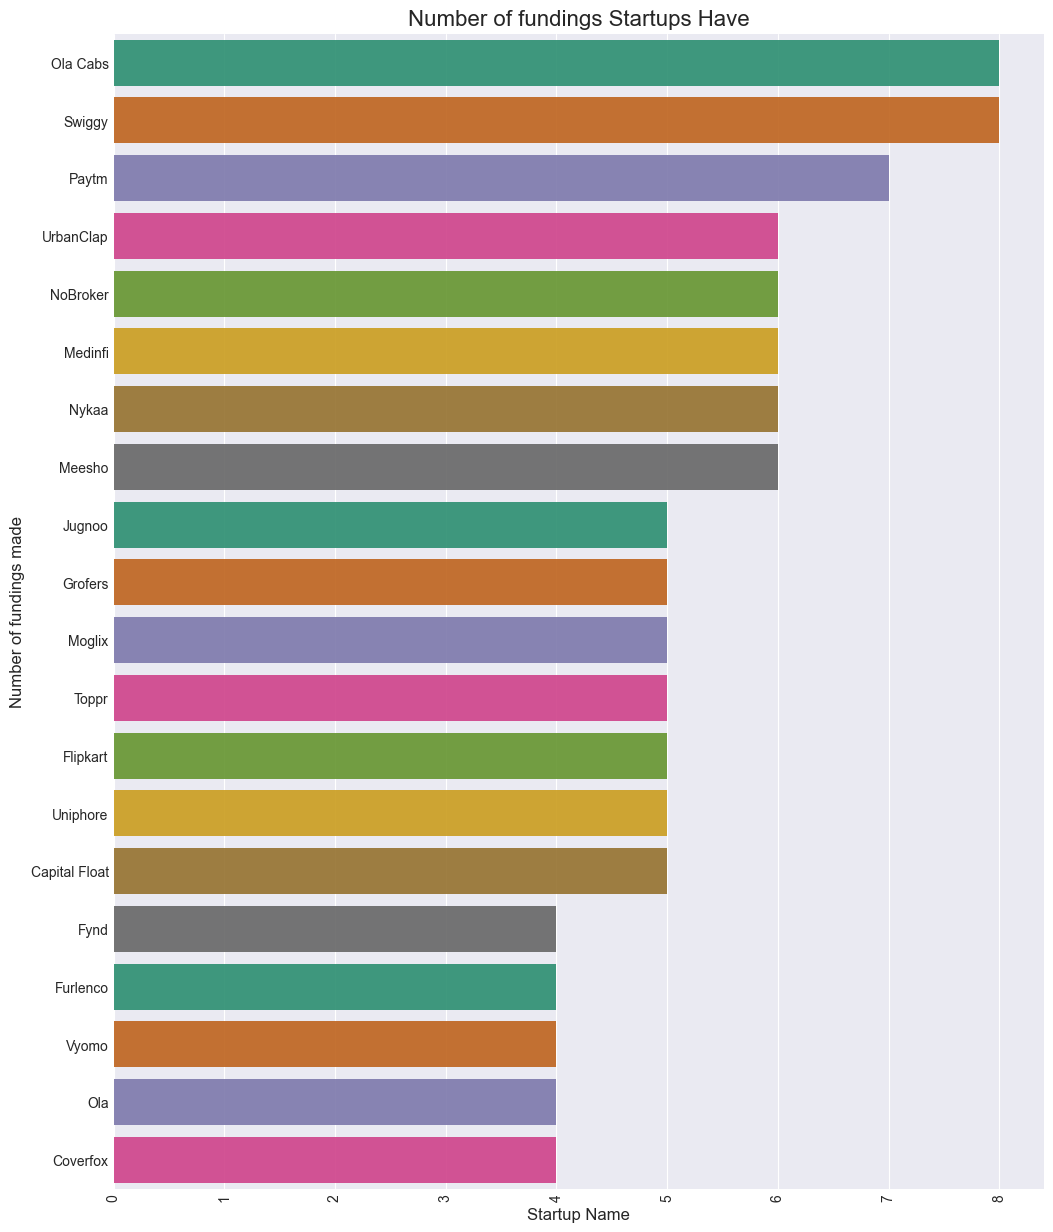

In [30]:
print('Total startups funded: ',len(data['StartupName'].unique()))
print(data['StartupName'].value_counts().head(10))
startupname= data['StartupName'].value_counts().head(20)
plt.figure(figsize=(12,15))
sns.barplot(y=startupname.index,x=startupname.values,alpha=0.9, palette='Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name',fontsize=12)
plt.ylabel('Number of fundings made',fontsize=12)
plt.title('Number of fundings Startups Have',fontsize=16)
plt.show()

which industries are preferred for startups

IndustryVertical
Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: count, dtype: int64


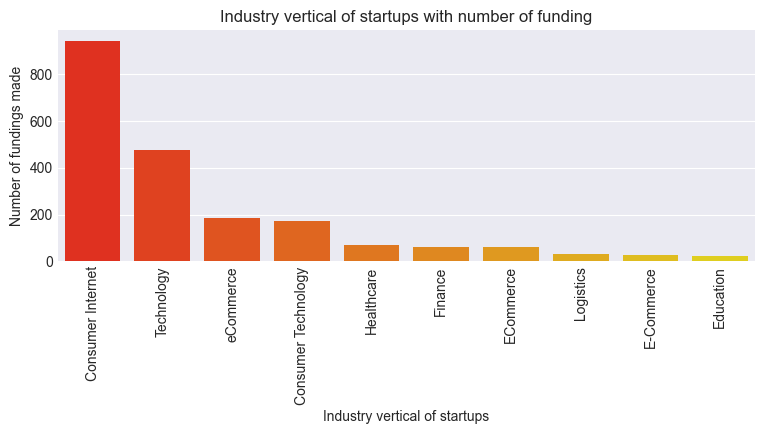

In [31]:
data['IndustryVertical']=data['IndustryVertical'].replace('nan','Consumer Technology')

industry=data['IndustryVertical'].value_counts().head(10)
print(industry)
fig=plt.figure(figsize=(9,3))
sns.barplot(x=industry.index,y=industry.values,palette='autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups')
plt.ylabel('Number of fundings made')
plt.title('Industry vertical of startups with number of funding')
plt.show()

SubVertical
Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Learning Platform                          5
Online Education Platform                         5
Online Lending                                    5
Online lending platform                           5
Education                                         5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Online Gifting platform                           3
B2B Marketplace                                   3
Online learning platform                          3
Online platform for Higher Education Services     3
Online Payment Gateway                            3
Online Furniture Store                            3
Online Insurance Aggregator                       3
Online Insurance Platform                         3
Agri-tech                                         3


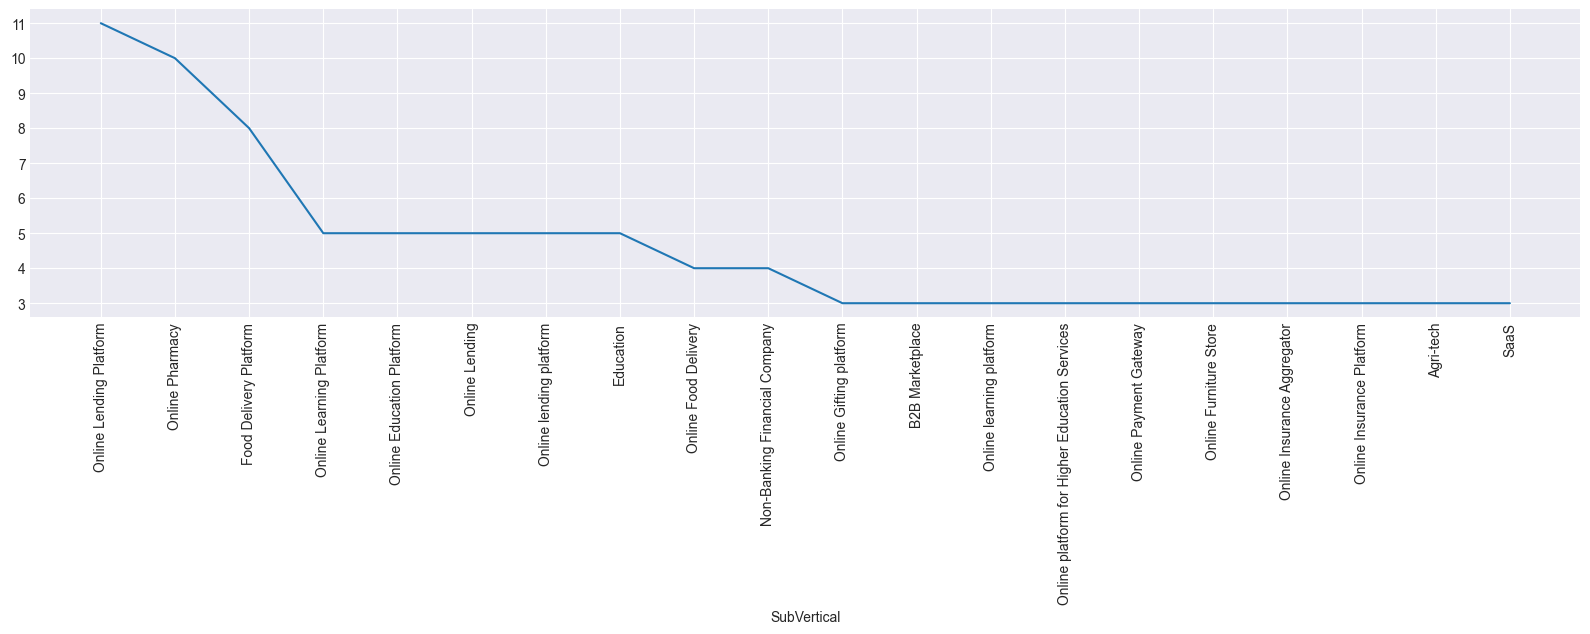

In [32]:
industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)
plt.figure(figsize=(20,4))
sns.lineplot(x=industry.index,y=industry.values)
plt.xticks(rotation='vertical')
plt.show()


Does location play a role

City
Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: count, dtype: int64


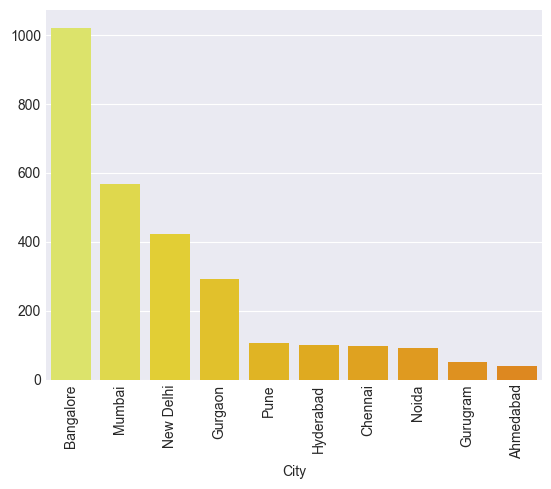

In [33]:
data['City']=data['City'].replace(('Bengaluru','nan'),('Bangalore','Bangalore'))
city=data['City'].value_counts().head(10)
print(city)

sns.barplot(x=city.index,y=city.values,palette='Wistia')
plt.xticks(rotation='vertical')
plt.show()

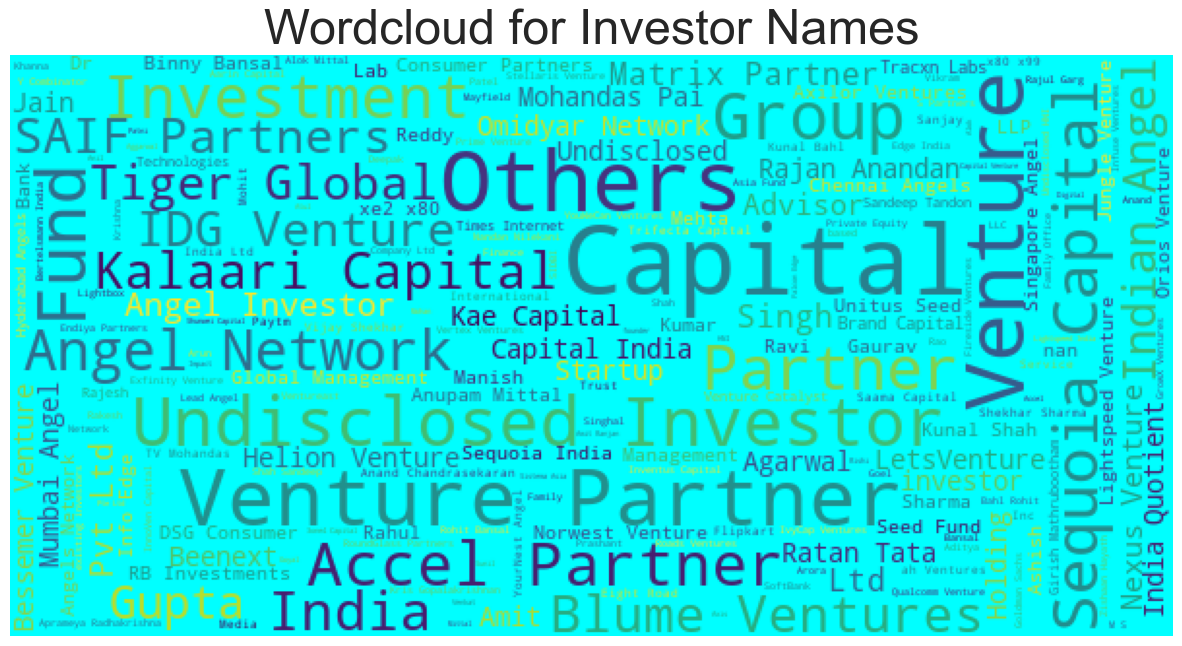

In [ ]:
#note: wordcloud runs on 3.12
import wordcloud
from wordcloud import WordCloud

names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

InvestorsName
Undisclosed Investors       122
Ratan Tata                   25
nan                          24
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
Name: count, dtype: int64


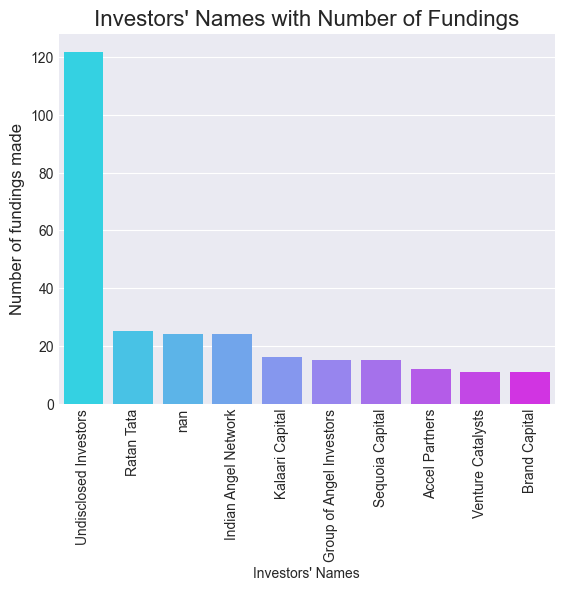

In [36]:
non_enum=['Undisclosed Investors','Undisclosed investors','Undisclosed Investor','Undisclosed','undisclosed investors',
            'Undisclosed investor','undisclosed investor','Undisclosed private investors','3 undisclosed investors',
            'Un disclosed investors','undisclosed private investors','Not Disclosed','High Networth Individuals (undisclosed)','Undisclosed angel investor','Undisclosed multiple investors'] 
data['InvestorsName']=data['InvestorsName'].apply(lambda x:'Undisclosed Investors' if x in non_enum else x)

investors = data['InvestorsName'].value_counts().head(10)
print(investors)
sns.barplot(x=investors.index,y=investors.values,palette='cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors\' Names')
plt.ylabel('Number of fundings made', fontsize=12)
plt.title('Investors\' Names with Number of Fundings',fontsize=16)
plt.show()

In [37]:
data['InvestmentType']=data['InvestmentnType']
data.drop(columns='InvestmentnType')

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,AmountInUSD,YearMonth,InvestmentType
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,200000000.0,202001,Private Equity Round
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,8048394.0,202001,Series C
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,18358860.0,202001,Series B
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,3000000.0,202001,Pre-series A
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,1800000.0,202001,Seed Round
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,Consumer Technology,nan,Bangalore,Asia Pacific Internet Group,4500000.0,201501,Private Equity
3040,3041,29/01/2015,Graphene,Consumer Technology,nan,Bangalore,KARSEMVEN Fund,825000.0,201501,Private Equity
3041,3042,30/01/2015,Mad Street Den,Consumer Technology,nan,Bangalore,"Exfinity Fund, GrowX Ventures.",1500000.0,201501,Private Equity
3042,3043,30/01/2015,Simplotel,Consumer Technology,nan,Bangalore,MakeMyTrip,0.0,201501,Private Equity


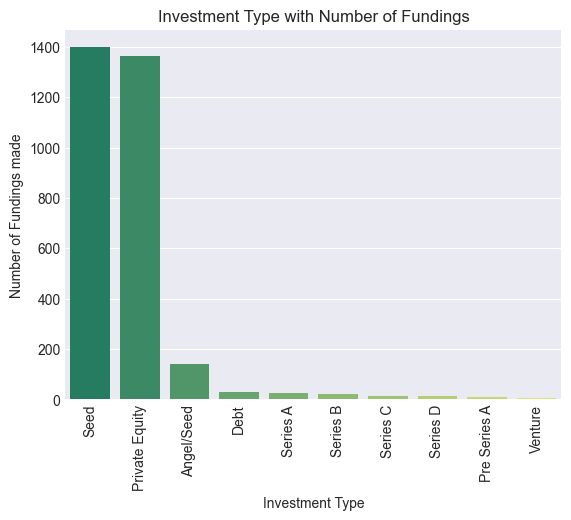

In [ ]:

#A helper function to enum values in ['InvestmentType']

def get_fndng(val):
       pre_a=['Pre Series A', 'pre-Series A', 'pre-series A', 'Pre-Series A','Pre-series A',]      
       srsb=['Series B','Series B (Extension)',]
       angel=['Angel','Angel Round','Angel Funding',]
       seed=['Seed Round','Seed Funding','Seed Funding Round','Seed funding','Seed\\\\nFunding','Seed',]
       venture=['Venture','Venture Round', 'Venture','Venture - Series Unknown',]
       debt=['Debt Funding','Debt','Debt-Funding','Structured Debt', 'Term Loan','Debt and Preference capital',]
       seed_angel=['Angel / Seed Funding','Seed / Angel Funding','Seed/ Angel Funding','Seed / Angle Funding','Seed/Angel Funding',  ]
       private_equity=['PrivateEquity',  'Private\\\\nEquity','Private',  'Private Equity','Private Equity Round','Private Funding',]  
       crowd=['Crowd funding', 'Crowd Funding']
       equity_based=['Equity Based Funding','Equity', ]
              
       dic=[(pre_a,'Pre Series A'),(srsb,'Series B'),(angel,'Angel'),(seed,'Seed'),(venture,'Venture'),(debt,'Debt'),(seed_angel,'Angel-Seed'),
       (private_equity,'Private Equity'),(crowd,'Crowd Funding'),(equity_based,'Equity Based')]

       for i in dic:
              if val in i[0]: return i[1]
       return val


data['InvestmentType']=data['InvestmentType'].apply(lambda cell: get_fndng(cell))
investment=data['InvestmentType'].value_counts().head(10)
sns.barplot(x=investment.index,y=investment.values,palette='summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type')
plt.ylabel('Number of Fundings made')
plt.title('Investment Type with Number of Fundings')
plt.show()


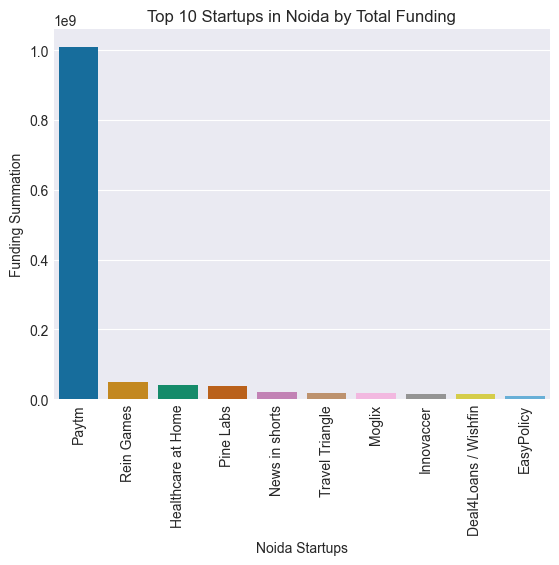

In [40]:
grouped=data.groupby(['StartupName','City'],as_index=False)['AmountInUSD'].sum().rename(columns={'AmountInUSD':'Total_AmountInUSD'})
Noida=grouped.loc[grouped['City']=='Noida'].sort_values(by='Total_AmountInUSD',ascending=False).reset_index().head(10)

sns.barplot(x=Noida['StartupName'],y=Noida['Total_AmountInUSD'],palette='colorblind')
plt.xticks(rotation='vertical')
plt.xlabel('Noida Startups')
plt.ylabel('Funding Summation')
plt.title('Top 10 Startups in Noida by Total Funding')
plt.show()

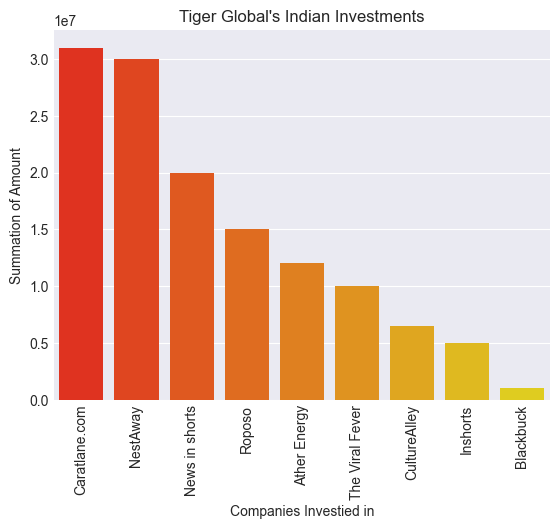

In [41]:
tg=data.groupby(['StartupName','InvestorsName'],as_index=False)['AmountInUSD'].sum().rename(columns={'AmountInUSD':'Total_AmountInUSD'})
tiger=tg.loc[tg['InvestorsName']=='Tiger Global'].sort_values(by='Total_AmountInUSD',ascending=False).reset_index()
sns.barplot(x=tiger['StartupName'],y=tiger['Total_AmountInUSD'],palette='autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Companies Investied in')
plt.ylabel('Summation of Amount')
plt.title('Tiger Global\'s Indian Investments')
plt.show()


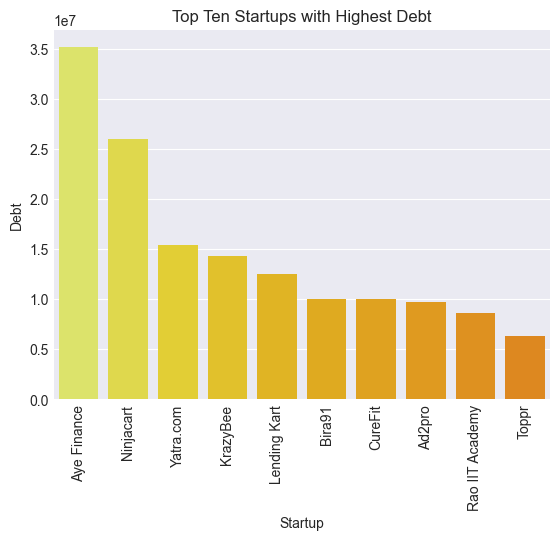

In [42]:
lk=['Lendingkart','LendingKart']
ay=['AYE Finance','AyeFinance','Aye Finance']
data['StartupName']=data['StartupName'].apply(lambda x:  'Lending Kart' if x in lk else 'Aye Finance' if x in ay else x)

fnt=data.groupby(['StartupName','InvestmentType'],as_index=False)['AmountInUSD'].sum().rename(columns={'AmountInUSD':'Total_AmountInUSD'})
debt=fnt.loc[fnt['InvestmentType']=='Debt'].sort_values(by=['Total_AmountInUSD','StartupName',],ascending=[False,True,]).reset_index(drop=True).head(10)
sns.barplot(x=debt['StartupName'],y=debt['Total_AmountInUSD'],palette='Wistia')
plt.xticks(rotation='vertical')
plt.title('Top Ten Startups with Highest Debt')
plt.ylabel('Debt')
plt.xlabel('Startup')
plt.show()